In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv("Electric_Vehicle_Population_Data (2).csv")

In [5]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [7]:
df['Postal Code Clean'] = df["Postal Code"].astype(str).str.split('.').str[0]
df["Disctric Cleaned"] = df["Legislative District"].astype(str).str.split('.').str[0]

In [8]:
df["Electric range in Miles"] = df["Electric Range"]
df["Electric range in Miles"] = df["Electric Range"].astype(str) + ' miles'
print(df[["Electric range in Miles"]])

       Electric range in Miles
0                    258 miles
1                     25 miles
2                     25 miles
3                    215 miles
4                     97 miles
...                        ...
150477                 0 miles
150478                 0 miles
150479                 0 miles
150480                30 miles
150481                 0 miles

[150482 rows x 1 columns]


In [9]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Postal Code Clean,Disctric Cleaned,Electric range in Miles
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,98103,43,258 miles
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,98011,1,25 miles
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10,98908,14,25 miles
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,98034,45,215 miles
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10,98501,22,97 miles


In [10]:
unique_counties = df["County"].unique()
print(unique_counties)

['King' 'Yakima' 'Thurston' 'Snohomish' 'Island' 'Kitsap' 'Whitman'
 'Skagit' 'Kittitas' 'Walla Walla' 'Spokane' 'Chelan' 'Grant' 'Stevens'
 'Clark' 'Douglas' 'Pierce' 'Jefferson' 'Cowlitz' 'Clallam' 'Benton'
 'Lewis' 'Klickitat' 'Grays Harbor' 'Asotin' 'San Juan' 'Whatcom'
 'Franklin' 'Okanogan' 'Mason' 'Skamania' 'Pacific' 'Pend Oreille'
 'Columbia' 'Wahkiakum' 'Marin' 'Adams' 'Lake' 'San Diego' 'Lincoln'
 'Platte' 'Kern' 'Maricopa' 'Goochland' 'Orange' 'Oldham' 'Hoke'
 'Anne Arundel' 'Frederick' 'District of Columbia' 'Laramie' 'Los Angeles'
 'Contra Costa' 'DeKalb' 'Madison' 'Ferry' 'Multnomah' 'Stafford'
 'Sarasota' 'Garfield' 'Calvert' 'Harrison' 'San Bernardino' 'Bexar'
 'Carroll' 'Riverside' 'Lee' 'Hawaii' 'Santa Clara' 'Nueces' 'Kings'
 'Cumberland' 'Hillsborough' 'El Paso' 'Santa Barbara' 'New Haven'
 'Vernon' 'Chesapeake' 'Polk' 'Ray' 'Wichita' 'Yellowstone' 'Kauai'
 'Fairfax' 'Harnett' 'Houston' 'Sacramento' 'Santa Cruz' 'Loudoun'
 'Dallas' 'Saratoga' 'Burlington' 'Williams

In [11]:
count_of_counties = unique_counties.size
print(f"Number of counties: {count_of_counties}")

Number of counties: 184


In [12]:
unique_models = df["Make"].unique()
count_of_models = unique_models.size
print(f"Number of Models: {count_of_models}")

Number of Models: 37


In [13]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Postal Code Clean', 'Disctric Cleaned', 'Electric range in Miles'],
      dtype='object')

In [14]:
evtype = df["Electric Vehicle Type"].unique()
evtype

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [15]:
cafvs = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()
cafvs

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [16]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
Postal Code Clean              

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Postal Code Clean                                    0
Disctric C

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150137.000000,150137.000000,150137.000000,150137.000000,150137.000000,1.501370e+05,1.501370e+05
mean,98257.884406,2020.007040,67.863978,1311.100961,29.344226,2.111399e+08,5.303968e+10
std,301.505834,3.015218,96.224883,9224.342308,14.824931,8.196455e+07,1.615372e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693919e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150583e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399286e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


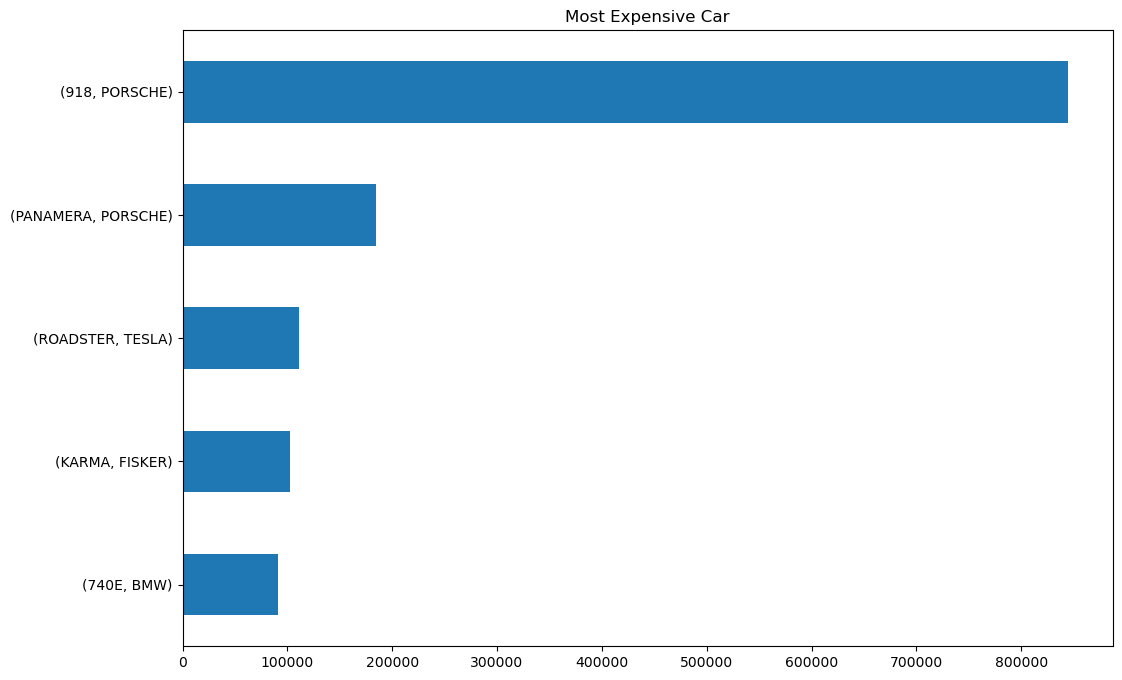

In [21]:
df.groupby(["Model","Make"])["Base MSRP"].max().sort_values(ascending=True).tail(5).plot(kind = 'barh', figsize=(12,8))
plt.title("Most Expensive Car")
plt.ylabel("")
plt.show()

In [22]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Postal Code Clean', 'Disctric Cleaned', 'Electric range in Miles'],
      dtype='object')

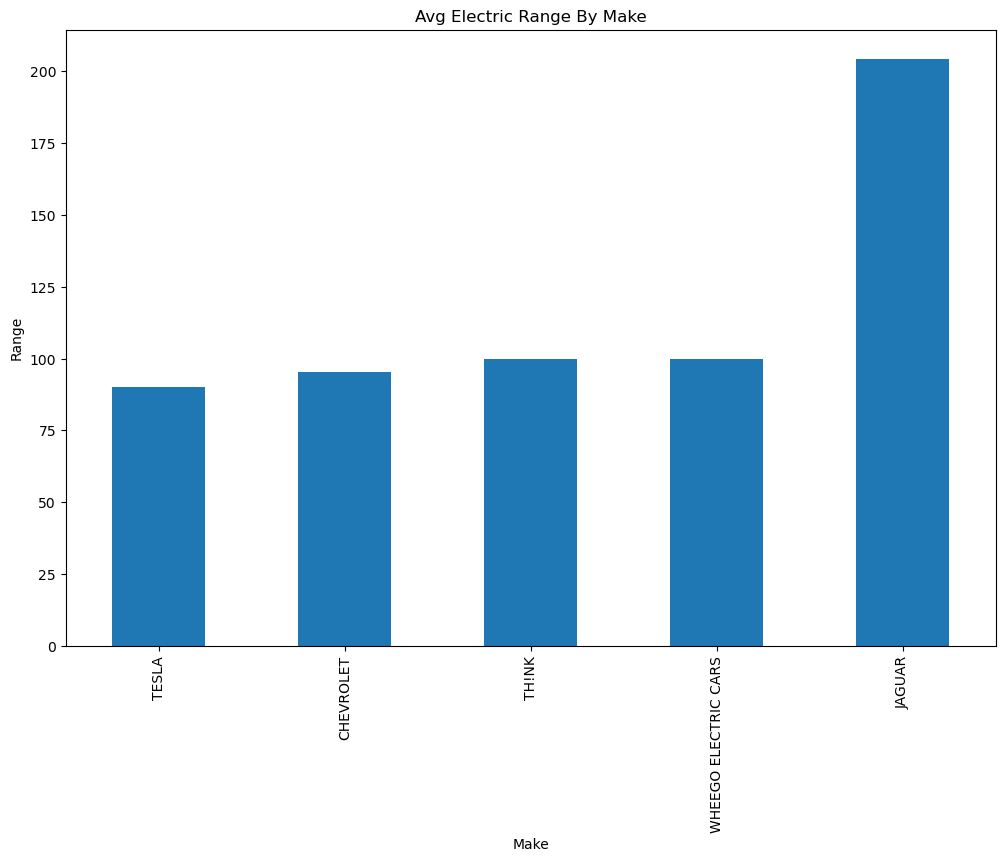

In [23]:
df.groupby("Make")["Electric Range"].mean().sort_values(ascending=True).tail(5).plot(kind="bar",figsize=(12,8))
plt.title("Avg Electric Range By Make")
plt.xlabel("Make")
plt.ylabel("Range")
plt.show()

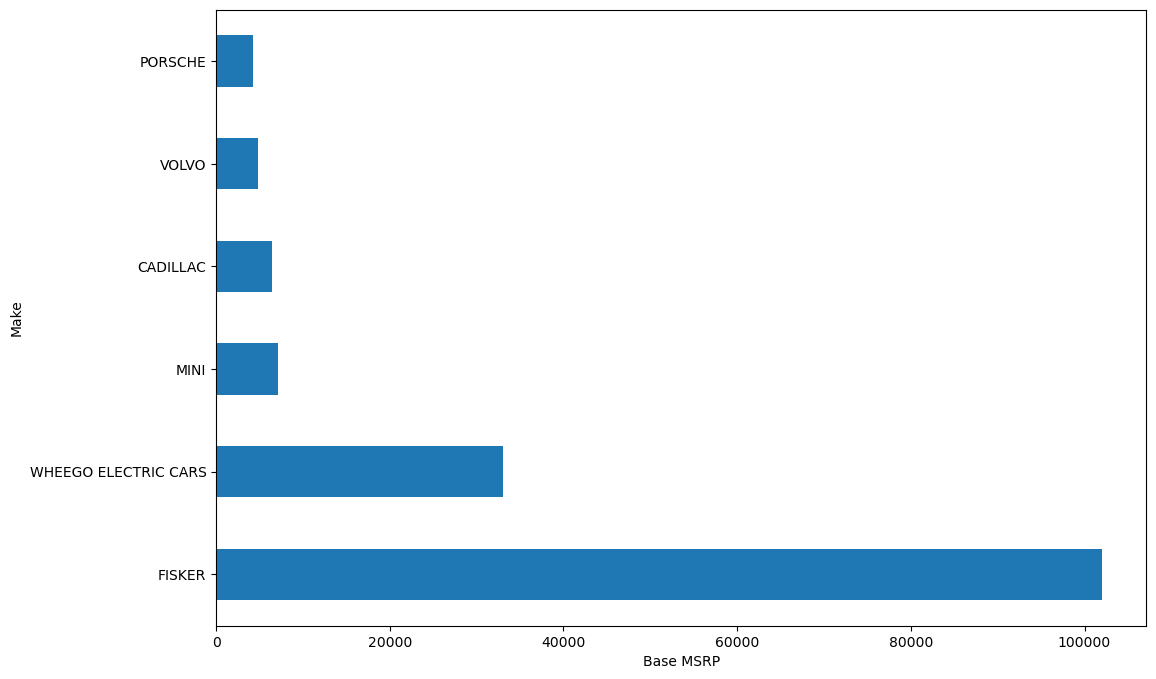

In [24]:
df.groupby("Make")["Base MSRP"].mean().sort_values(ascending=False).head(6).plot(kind = "barh", figsize=(12,8))
plt.xlabel("Base MSRP")
plt.show()

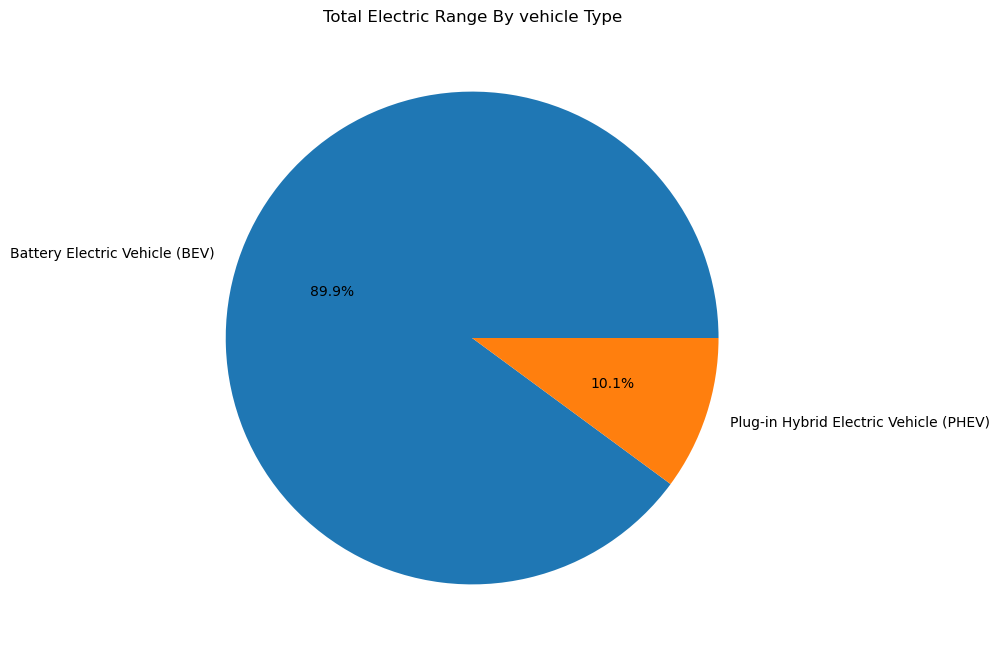

In [25]:
total_raneg_by_type = df.groupby("Electric Vehicle Type")["Electric Range"].sum()
total_raneg_by_type.plot(kind="pie",figsize=(8,8), autopct="%1.1f%%")
plt.title("Total Electric Range By vehicle Type")
plt.ylabel("")
plt.show()

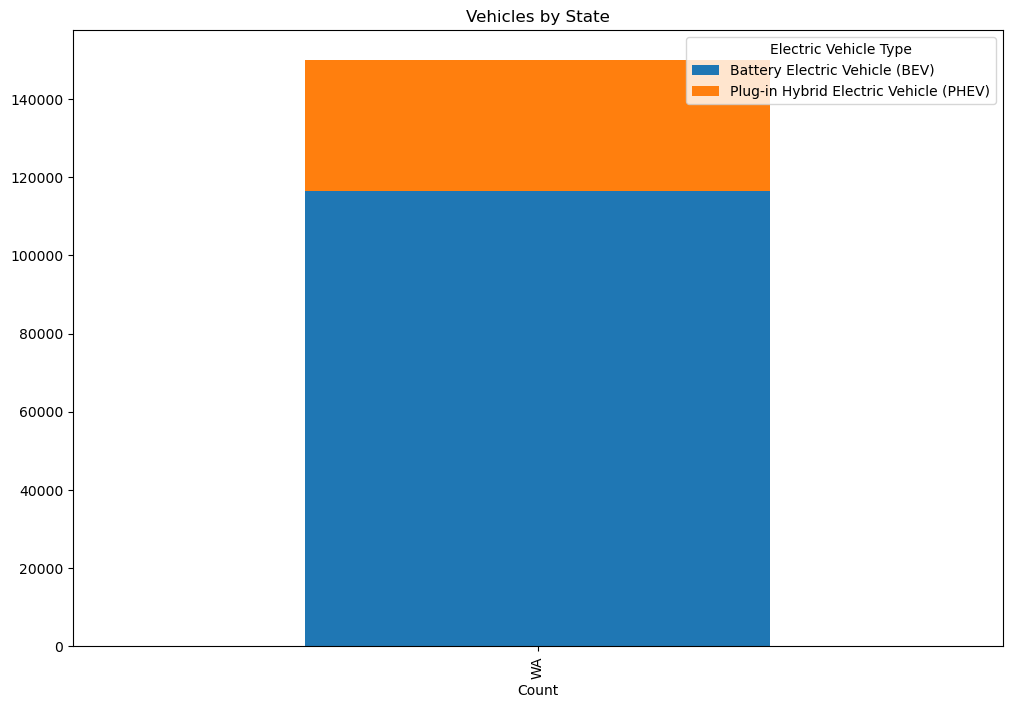

In [26]:
state_vehicle_counts = df.groupby(["State", "Electric Vehicle Type"]).size().unstack(fill_value=0)
state_vehicle_counts.plot(kind="bar",stacked = True, figsize=(12,8))
plt.title("Vehicles by State")
plt.xlabel("Count")
plt.show()

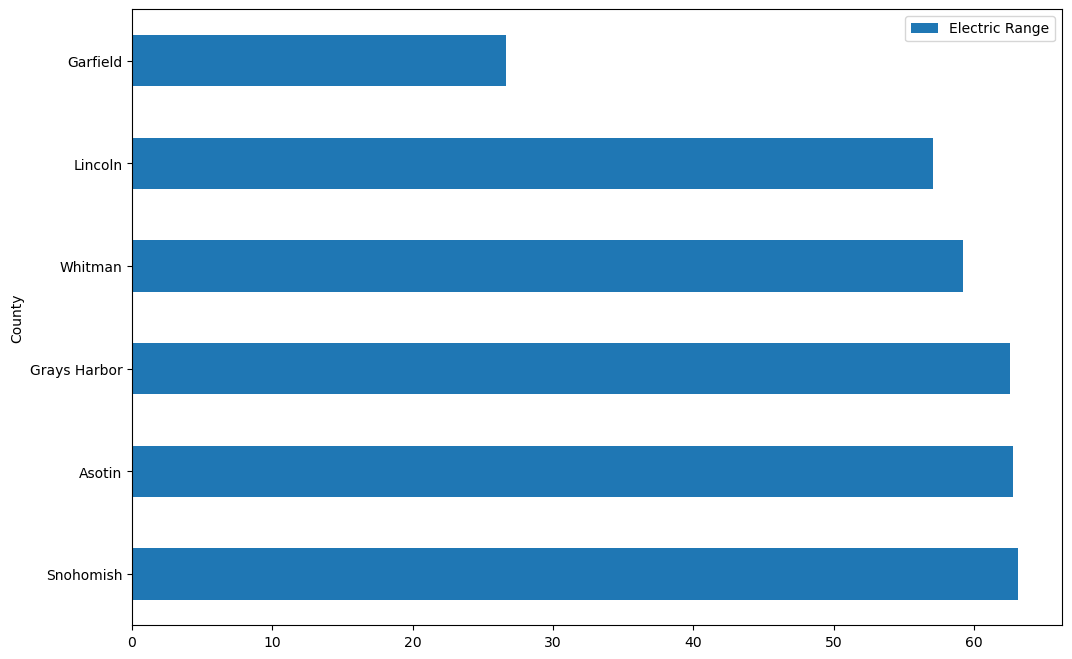

In [27]:
avg_range_by_county = df.groupby("County")["Electric Range"].mean().reset_index()
avg_range_by_county.sort_values(by="Electric Range").sort_values(by=("Electric Range"),ascending=False).tail(6).plot(kind="barh", x="County",y="Electric Range",figsize=(12,8))
plt.show()

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [29]:
df["County"] = LabelEncoder().fit_transform(df["County"])
df["Make"] = LabelEncoder().fit_transform(df["Make"])
df["Electric Vehicle Type"] = LabelEncoder().fit_transform(df["Electric Vehicle Type"])
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = LabelEncoder().fit_transform(df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])

In [30]:
X=df[["County","Make","Electric Vehicle Type","Clean Alternative Fuel Vehicle (CAFV) Eligibility"]]

In [31]:
Y=df[["Electric Range"]]

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_train

array([[ 1.45377659,  0.71514998, -0.53641604, -1.04739713],
       [-0.40684772,  0.71514998, -0.53641604, -1.04739713],
       [-0.40684772, -1.67118533,  1.86422463, -1.04739713],
       ...,
       [ 1.32973497,  1.09696363,  1.86422463,  1.94824096],
       [-0.2828061 ,  0.1424295 , -0.53641604, -1.04739713],
       [-0.40684772,  0.71514998, -0.53641604, -1.04739713]])

In [36]:
import joblib 
joblib.dump(scaler, "scalerEV.pkl")

['scalerEV.pkl']

In [37]:
X_test = scaler.fit_transform(X_test)

In [38]:
X_train

array([[ 1.45377659,  0.71514998, -0.53641604, -1.04739713],
       [-0.40684772,  0.71514998, -0.53641604, -1.04739713],
       [-0.40684772, -1.67118533,  1.86422463, -1.04739713],
       ...,
       [ 1.32973497,  1.09696363,  1.86422463,  1.94824096],
       [-0.2828061 ,  0.1424295 , -0.53641604, -1.04739713],
       [-0.40684772,  0.71514998, -0.53641604, -1.04739713]])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
def modelresults(predictions):
    print("Mean absolute error on model is:{}" .format(mean_absolute_error(Y_test,predictions)))
    print("Mean Squared error on model is:{}" .format(np.sqrt(mean_squared_error(Y_test,predictions))))

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train,Y_train)

LinearRegression()

In [43]:
lrpreds = lr.predict(X_test)

In [44]:
modelresults(lrpreds)

Mean absolute error on model is:62.85005356823188
Mean Squared error on model is:71.28726514922646


In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
Param_grid = {
    "max_depth" : [10,30],
    "min_samples_leaf" : [1,2],
    "min_samples_split" : [2,5]
}

In [47]:
treemodel = DecisionTreeRegressor()

In [48]:
grid_tree = GridSearchCV(estimator=treemodel, param_grid = Param_grid)

In [49]:
grid_tree.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [50]:
treepreds = grid_tree.predict(X_test)

In [51]:
modelresults(treepreds)

Mean absolute error on model is:10.78993305275795
Mean Squared error on model is:21.94059484556576


In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rfrmodel = RandomForestRegressor()

In [54]:
param_gridrfr = {"max_depth": [5,15], "n_estimators" : [2,5,8]}

In [55]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [56]:
gridrfr.fit(X_train,Y_train)

c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 8]})

In [57]:
rfpreds = gridrfr.predict(X_test)

In [58]:
modelresults(rfpreds)

Mean absolute error on model is:10.780135543977432
Mean Squared error on model is:21.941890089997475


In [59]:
knn = KNeighborsRegressor()
knn_param_grid = {"n_neighbors": [3,5,7,9]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [60]:
knn_grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [61]:
knnpreds = knn_grid_search.predict(X_test)

In [62]:
modelresults(knnpreds)

Mean absolute error on model is:11.01605538534405
Mean Squared error on model is:23.278162812555113


In [63]:
import joblib
joblib.dump(knnpreds, "knn.model.pkl")

['knn.model.pkl']

In [64]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {"n_estimators": [50,100,200],
                  "learning_rate": [0.1,0.5,1]}

In [65]:
ada_grid_search = GridSearchCV(ada, ada_param_grid)

In [66]:
ada_grid_search.fit(X_train, Y_train)

c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ttt12\anaconda4\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [67]:
adapreds = ada_grid_search.predict(X_test)

In [68]:
modelresults(adapreds)

Mean absolute error on model is:16.60837582642221
Mean Squared error on model is:32.48518370275741


In [69]:
import joblib
joblib.dump(rfrmodel, "rfr.model.pkl")

['rfr.model.pkl']

In [70]:
import joblib
joblib.dump(lr, "lr.model.pkl")

['lr.model.pkl']

In [71]:
import pandas as pd 
import numpy as np

In [72]:
new_df = pd.read_csv("predicted_range_full.csv")

In [73]:
new_df.head()

,County,Car Make,EV Type,CAFV Eligibility,Predicted Range
0,King,HYUNDAI,0,Eligible,[112.07518832]
1,King,HYUNDAI,0,Not Eligible,[14.93040902]
2,King,HYUNDAI,0,Unknown,[-82.21437027]
3,King,HYUNDAI,1,Eligible,[119.91007338]
4,King,HYUNDAI,1,Not Eligible,[22.76529408]


In [74]:
data_raw=pd.read_csv("Electric_Vehicle_Population_Data (2).csv")
data_raw.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [75]:
data_raw = data_raw.rename(columns={'Make': 'Car Make'})
data_raw = data_raw.rename(columns={'Electric Vehicle Type': 'EV Type'})

In [76]:
data_raw.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Car Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [77]:
data_raw['Postal Code'] = data_raw['Postal Code'].astype(str).str.split('.').str[0]
data_raw['Legislative District'] = data_raw['Legislative District'].astype(str).str.split('.').str[0]

In [78]:
data_raw.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Car Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [79]:
data_raw["Electric Range"].dtype

dtype('int64')

In [80]:
data_raw.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Car Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [81]:
new_df.head(1)

,County,Car Make,EV Type,CAFV Eligibility,Predicted Range
0,King,HYUNDAI,0,Eligible,[112.07518832]


In [82]:
new_df["Predicted Range"] = new_df["Predicted Range"].apply(lambda x: float(x.strip('[]')))

In [83]:
new_df.head(1)

,County,Car Make,EV Type,CAFV Eligibility,Predicted Range
0,King,HYUNDAI,0,Eligible,112.075188


In [84]:
avg_range = new_df["Predicted Range"].mean()
print(f"Average Predicted Range: {avg_range:.2f} miles")

Average Predicted Range: 30.36 miles


In [85]:
tableau_data1 = pd.merge(data_raw, new_df, on=["County", "Car Make"])
tableau_data1.tail(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Car Make,Model,EV Type_x,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,EV Type_y,CAFV Eligibility,Predicted Range
902815,YV4BR0CZ5N,Howard,Ellicott City,MD,21042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,nan,185596036,POINT (-76.83207 39.276485),NON WASHINGTON STATE ELECTRIC UTILITY,2.402760e+10,0,Not Eligible,20.768830
902816,YV4BR0CZ5N,Howard,Ellicott City,MD,21042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,nan,185596036,POINT (-76.83207 39.276485),NON WASHINGTON STATE ELECTRIC UTILITY,2.402760e+10,0,Unknown,-76.375949
902817,YV4BR0CZ5N,Howard,Ellicott City,MD,21042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,nan,185596036,POINT (-76.83207 39.276485),NON WASHINGTON STATE ELECTRIC UTILITY,2.402760e+10,1,Eligible,125.748495
902818,YV4BR0CZ5N,Howard,Ellicott City,MD,21042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,nan,185596036,POINT (-76.83207 39.276485),NON WASHINGTON STATE ELECTRIC UTILITY,2.402760e+10,1,Not Eligible,28.603716
902819,YV4BR0CZ5N,Howard,Ellicott City,MD,21042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,nan,185596036,POINT (-76.83207 39.276485),NON WASHINGTON STATE ELECTRIC UTILITY,2.402760e+10,1,Unknown,-68.541064


In [86]:
data_raw.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Car Make,Model,EV Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10


In [87]:
tableau_data1.to_csv('tableau_data1.csv', index = False)

In [89]:
tableau_data1['Electric Range'].astype(int)

0         258
1         258
2         258
3         258
4         258
         ... 
902815     18
902816     18
902817     18
902818     18
902819     18
Name: Electric Range, Length: 902820, dtype: int32